# Part 1: Introduction

This notebook contains the code to replicate the results and figures for our paper:
<blockquote>Ooi, K.; Lam, B.; Hong, J.; Watcharasupat, K. N.; Ong, Z.-T.; Gan, W.-S. Singapore Soundscape Site Selection Survey (S5): Identification of Characteristic Soundscapes of Singapore via Weighted k-means Clustering. Sustainability 2022, 13, x. https://doi.org/10.3390/xxxxx</blockquote>
You may find it helpful to have the full text of the paper open while running this notebook to reference the full details on how the study was conducted and the results we reported. The study area is the country of Singapore, and a map of the regions is shown below:

<img src="..\\figures\\singapore_map.svg" width=700>

Each part (denoted by top-level headers) of the notebook can be run in isolation, or you can also run the notebook from the start to the end as well.
We first import the necessary packages and functions that we will be using for the notebook.

In [1]:
import os, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from s5_utils import haversine_distance, weighted_kmeans, dunn, sigmoid, plot_results, autolabel

# Part 2: Demographic information plots

Firstly, we make the plots for the aggregated demographic information of the participants. The following block contains the aggregated data arranged as dictionaries.

In [2]:
ages = {'10-19': 0, '20-29': 17, '30-39': 5, '40-49': 15, '50-59': 19, '60-69': 8, '70-79': 3}
years = {'10-19': 3, '20-29': 16, '30-39': 8, '40-49': 11, '50-59': 18, '60-69': 8, '70-79': 3}
gender = {'Male': 34, 'Female': 33, 'Other/prefer not to say': 0}
region = {'Central Area': 2, 'Central Region': 16, 'East Region': 10, 'North Region': 11, 'North-east Region': 16, 'West Region': 12}
wnss = {'[2.0, 2.5)': 5,'[2.5, 3.0)': 8, '[3.0, 3.5)': 23, '[3.5, 4.0)': 25, '[4.0, 4.5)': 6}
stb = {'Yes': 50, 'No': 17}

The following block makes the plots as they appear in the manuscript.

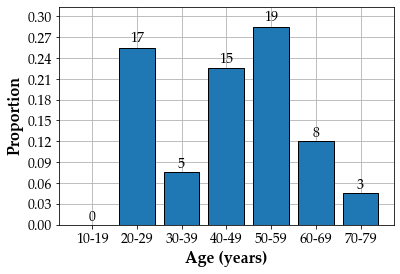

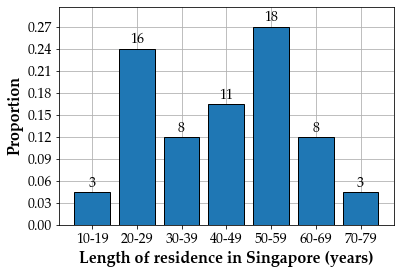

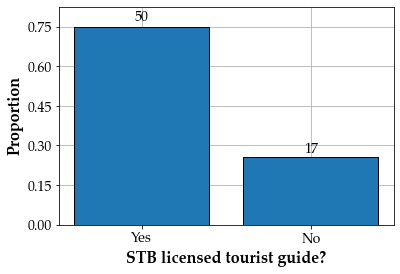

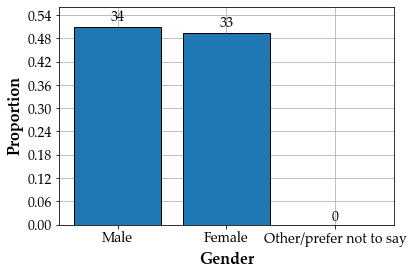

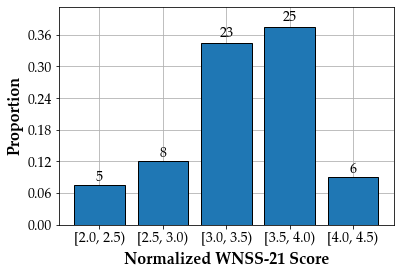

In [3]:
plt.rcParams['font.family']='Palatino Linotype'

fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
ages_plot = axs.bar([10,20,30,40,50,60,70],ages.values(),width = 8,edgecolor='black')
axs.set_xticks([10,20,30,40,50,60,70])
axs.set_xticklabels(labels = ages.keys(), fontsize=14)
axs.set_yticks(np.arange(0,22,2))
axs.set_yticklabels(labels = [f'{i:.2f}' for i in np.round(np.arange(0,22,2)/67,2)], fontsize=14) # Standardise label format
axs.set_xlabel('Age (years)',fontsize=16,fontweight='bold')
axs.set_ylabel('Proportion',fontsize=16,fontweight='bold')
axs.margins(y=0.1) # Gives some space for frequency labels to display neatly
autolabel(ages_plot, axs, 0) # Add exact frequency labels
axs.set_axisbelow(True) # Makes grid go behind bars
plt.grid()

fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
years_plot = axs.bar([10,20,30,40,50,60,70],years.values(),width = 8,edgecolor='black')
axs.set_xticks([10,20,30,40,50,60,70])
axs.set_xticklabels(labels = years.keys(), fontsize=14)
axs.set_yticks(np.arange(0,22,2))
axs.set_yticklabels(labels = [f'{i:.2f}' for i in np.round(np.arange(0,22,2)/67,2)], fontsize=14)
axs.set_xlabel('Length of residence in Singapore (years)',fontsize=16,fontweight='bold')
axs.set_ylabel('Proportion',fontsize=16,fontweight='bold')
axs.margins(y=0.1)
autolabel(years_plot, axs, 0)
axs.set_axisbelow(True) 
plt.grid()

fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
stb_plot = axs.bar([10,20],stb.values(),width = 8,edgecolor='black')
axs.set_xticks([10,20])
axs.set_xticklabels(labels = stb.keys(), fontsize=14)
axs.set_yticks(np.arange(0,60,10))
axs.set_yticklabels(labels = [f'{i:.2f}' for i in np.round(np.arange(0,60,10)/67,2)],fontsize=14)
axs.set_xlabel('STB licensed tourist guide?',fontsize=16,fontweight='bold')
axs.set_ylabel('Proportion',fontsize=16,fontweight='bold')
axs.margins(y=0.1)
autolabel(stb_plot, axs, 0)
axs.set_axisbelow(True)
plt.grid()

fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
gender_plot = axs.bar([10,20,30],gender.values(),width = 8,edgecolor='black')
axs.set_xticks([10,20,30])
axs.set_xticklabels(labels = gender.keys(), fontsize=14)
axs.set_yticks(np.arange(0,40,4))
axs.set_yticklabels(labels = [f'{i:.2f}' for i in np.round(np.arange(0,40,4)/67,2)],fontsize=14)
axs.set_xlabel('Gender',fontsize=16,fontweight='bold')
axs.set_ylabel('Proportion',fontsize=16,fontweight='bold')
axs.margins(y=0.1)
autolabel(gender_plot, axs, 0)
axs.set_axisbelow(True)
plt.grid()

fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
wnss_plot = axs.bar([10,20,30,40,50],wnss.values(),width = 8,edgecolor='black')
axs.set_xticks([10,20,30,40,50])
axs.set_xticklabels(labels = wnss.keys(), fontsize=14)
axs.set_yticks(np.arange(0,30,4))
axs.set_yticklabels(labels = [f'{i:.2f}' for i in np.round(np.arange(0,30,4)/67,2)],fontsize=14)
axs.set_xlabel('Normalized WNSS-21 Score',fontsize=16,fontweight='bold')
axs.set_ylabel('Proportion',fontsize=16,fontweight='bold')
axs.margins(y=0.1)
autolabel(wnss_plot, axs, 0)
axs.set_axisbelow(True)
plt.grid()

plt.show()

Expected output of the above block:

<img src="..\\figures\\demographics_ages.svg" width=400><img src="..\\figures\\demographics_years.svg" width=400><img src="..\\figures\\demographics_stb.svg" width=400><img src="..\\figures\\demographics_gender.svg" width=400><img src="..\\figures\\demographics_wnss.svg" width=400>

# Part 3: Weight Assignment

Read the raw data of responses provided by the participants in the study.

In [4]:
latlng = pd.read_csv(os.path.join('..','data','latlng.csv'))
latlng

,Full of life & exciting [Latitude],Full of life & exciting [Longitude],Full of life & exciting [# times visited],Full of life & exciting [Duration],Chaotic & restless [Latitude],Chaotic & restless [Longitude],Chaotic & restless [# times visited],Chaotic & restless [Duration],Calm & tranquil [Latitude],Calm & tranquil [Longitude],Calm & tranquil [# times visited],Calm & tranquil [Duration],Boring & lifeless [Latitude],Boring & lifeless [Longitude],Boring & lifeless [# times visited],Boring & lifeless [Duration]
0,1.283745,103.858361,4,30.0,1.281718,103.848018,4,30,1.294944,103.846516,4,60,1.304318,103.849885,4,10
1,1.290449,103.851652,3,120.0,1.300795,103.853962,4,60,1.295171,103.851958,3,60,1.294386,103.846666,1,60
2,1.313840,103.815914,4,60.0,1.284613,103.846675,4,10,1.293868,103.846628,4,60,1.286566,103.846544,3,10
3,1.284755,103.842807,4,90.0,1.283886,103.851932,1,45,1.284618,103.839914,3,90,1.289841,103.837487,1,45
4,1.299664,103.843740,4,15.0,1.285034,103.843311,1,15,1.281129,103.856744,2,60,1.280143,103.837303,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.310827,103.795325,4,120.0,1.338521,103.705825,4,30,1.335754,103.729858,4,120,1.308381,103.688745,4,120
398,1.333287,103.742368,4,60.0,1.310119,103.710267,1,20,1.317605,103.705825,4,60,1.391549,103.698723,4,20
399,1.334188,103.741874,4,240.0,1.342082,103.692050,4,60,1.297483,103.765564,2,180,1.327473,103.693380,1,30
400,1.332830,103.743266,4,120.0,1.333044,103.742489,4,10,1.333169,103.735644,1,10,1.374109,103.717327,1,10


Notice that the data is separated into four independent sets based on the ISO 12913 circumplex model of soundscape perception:

<img src="..\\figures\\circumplex.svg" width=200>

We first illustrate how we assign the weights for each point chosen by the participants. The weight of each point is the output of the sigmoid function that takes as input the "frequency weight", multiplied by the duration in days spent there each time as reported by the participant. The "frequency weight" is derived from the actual frequency reported by the participants via the following conversion table:

<table>
    <thead>
        <tr>
            <th align='center'>Response (no. of times visited)</th>
            <th align='center'>Frequency weight</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td align='center'>1 to 3 times</td>
            <td align='center'>1</td>
        </tr>
        <tr>
            <td align='center'>4 to 6 times</td>
            <td align='center'>2</td>
        </tr>
        <tr>
            <td align='center'>7 to 9 times</td>
            <td align='center'>3</td>
        </tr>
        <tr>
            <td align='center'>10 or more times</td>
            <td align='center'>4</td>
        </tr>
    </tbody>
</table>

We shall plot of the weights for responses corresponding to each quadrant of the circumplex model as follows:

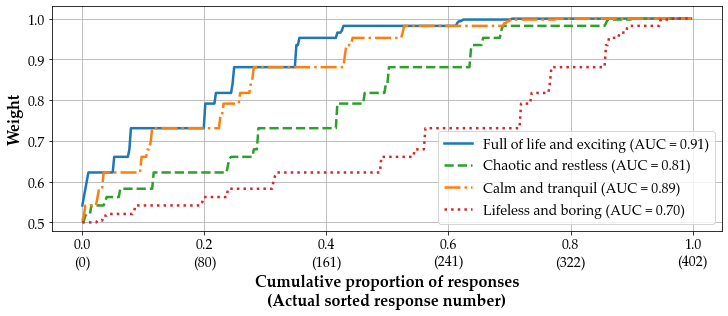

In [5]:
plt.rcParams['font.family']='Palatino Linotype'
plt.figure(figsize = (8*1.5,2.75*1.5))
for start_idx, attribute, fmt, color in zip([0,4,8,12],
                                            ['Full of life and exciting','Chaotic and restless','Calm and tranquil','Lifeless and boring'],
                                            ['-','--','-.',':'],
                                            ['#1F77B4','#2CA02C','#FF7F0E','#D62728']):
    points = latlng.iloc[:,start_idx:start_idx+2].to_numpy() # points.shape = (402,2)
    weights = np.expand_dims( sigmoid(latlng.iloc[:,start_idx+2].combine(latlng.iloc[:,start_idx+3],np.dot)/60).to_numpy() , axis = -1) # weights.shape = (402,1)
    
    # GET DATA TO PLOT
    x = np.arange(len(weights))/len(weights)
    y = np.sort(weights, axis = 0)
    AUC = np.sum(weights)/len(weights)
    x_label = 'Cumulative proportion of responses\n(Actual sorted response number)'
    
    # MAKE PLOT
    plt.plot(x, y, fmt, linewidth = 2.5, color=color, label=f'{attribute} (AUC = {AUC:.2f})')
    plt.xlabel(x_label, fontsize = 16,fontweight='bold')
    plt.ylabel('Weight', fontsize = 16, fontweight = 'bold') # = ("confidence")
    plt.xticks(ticks = np.arange(0,1.2,0.2), labels = ['0.0\n(0)','0.2\n(80)','0.4\n(161)','0.6\n(241)','0.8\n(322)','1.0\n(402)'], fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylim((0.48,1.03))
    plt.grid(visible=True)
plt.legend(loc='lower right', fontsize = 14)
plt.show()

Expected output of the above block:

<img src="..\\figures\\weights.svg" width=700>

# Part 4: Weighted k-means Clustering

## Dunn index

We use the Dunn index as an internal validity measure for the clusters, and decide on the optimal number of clusters based on the run with the highest Dunn index. The Dunn index is computed as follows:

Consider a (real) vector space $\mathcal{V}$ equipped with a norm $d$, and a set of points $X$ in $\mathcal{V}$ partitioned into $k$ pairwise-disjoint sets $\{X_1,X_2,\dots,X_k\} =: P$.

Note that in the context of our clustering method here, $X$ is the set of points in our dataset, the norm $d$ is the haversine distance, and the $k$ sets are the $k$ clusters given as a result of the $k$-means algorithm.

Define:
- the _**diameter**_ of a set $A$ as $\text{diam}(A) = \underset{x,y\in A}{\text{max}}d(x,y)$, and
- the _**distance**_ between two sets $A$ and $B$ as $\text{dist}(A,B) = \underset{x\in A,y\in B}{\text{min}}d(x,y)$

The Dunn index of $X$ is defined as follows (according to Dunn (1973) "A Fuzzy Relative of the ISODATA Process and Its Use in Detecting Compact Well Separated Clusters"):

$\alpha(P,k) = \frac{ \underset{1\leq i< j\leq k}{\text{min}} \text{dist}(X_i,X_j)}{\underset{1\leq i\leq k}{\text{max}}\text{diam}(X_i)}$

Hence, in the context of clustering, the the Dunn index varies depending on the choice of the number of clusters $k$ and the partition of points $P$. It is interpretable as

$\alpha(P,k) = \frac{ \text{Minimum intercluster distance} }{ \text{Maximum intracluster distance} }$,

which makes a higher value "better" in terms of clusters.

Note that this method of calculation is identical to the one performed by the `clValid` package in R (please refer to https://cran.r-project.org/web/packages/clValid/vignettes/clValid.pdf for the documentation and https://github.com/cran/clValid/blob/master/R/clValid-functions.R for the source).

## k-means++ algorithm

We cluster the points via a weighted k-means++ algorithm. The k-means++ algorithm is identical to the k-means algorithm, but it initialises the cluster centres as follows:

1. Take one centre $c_1$, chosen uniformly at random from the set of points $\mathcal{X}$.
2. Take a new centre $c_i$, choosing $x\in\mathcal{X}$ with probability $\frac{\left[D(x)\right]^2}{\sum_{x\in\mathcal{X}}\left[D(x)\right]^2}$, where $D(x) = \underset{c\in\{c_1, \dots, c_i\}}{\min}d(c,x)$ is the distance from the point $x$ to its closest centre, based on the current set of centres that have been chosen.
3. Repeat Step 2, until $k$ centres have been chosen altogether ($k$ here is a user-defined hyperparameter).

## Actual implementation

We specify the user-defined parameters for the k-means++ algorithm:

In [20]:
n_runs = 100 # Will run each value of k for this number of times
k_max = 20 # Maximum number of clusters

We perform the actual clustering in the next block, saving the seed value, Dunn index, centres, and cluster assignments for each run.

In [7]:
expt_results = {}
seed_val = 0 # Will increment by 1 for every new run.

for start_idx, attribute in zip([0,4,8,12], ['Full of life & exciting','Chaotic & restless','Calm & tranquil','Boring & lifeless']):
    points = latlng.iloc[:,start_idx:start_idx+2].to_numpy() # points.shape = (402,2)
    weights = np.expand_dims( sigmoid(latlng.iloc[:,start_idx+2].combine(latlng.iloc[:,start_idx+3],np.dot)/60).to_numpy() , axis = -1) # weights.shape = (402,1)

    k_dicts = {}

    for k in range(2,k_max+1):
        seed_vals = []
        dunn_indexes = []
        centress = []
        clusterss = []

        for run in range(n_runs):
            print(f'k = {k}, run = {run+1}, attribute = {attribute:30s}', end='\r')

            centres, clusters = weighted_kmeans(points = points,
                                                weights = weights,
                                                k = k,
                                                metric = haversine_distance,
                                                seed_val = seed_val,
                                                clinit = 'plusplus',
                                                max_iter = 100,
                                                verbose = False,
                                                show_plots = False)
            dunn_index_current = dunn(points,clusters,metric=haversine_distance,verbose=False)

            seed_vals.append(seed_val)
            dunn_indexes.append(dunn_index_current)
            centress.append(centres)
            clusterss.append(clusters)

            seed_val += 1

        k_dict = {'seed_vals':seed_vals,'dunn_indexes':dunn_indexes,'centres':centress,'clusters':clusterss}
        k_dicts[k] = k_dict

    expt_results[attribute] = k_dicts

with open('expt_results.pickle','wb') as fh:
    pickle.dump(expt_results,fh)
print('\nFinished')

k = 20, run = 100, attribute = Boring & lifeless             
Finished


The final results are saved in `expt_results.pickle`.

# Part 5: Analysis & plots

Load the experiment results.

In [8]:
with open('expt_results.pickle','rb') as fh:
    expt_results = pickle.load(fh)

Get the highest Dunn index across all runs for each value of k and each attribute ("Full of life & exciting", "Chaotic & restless", "Calm & tranquil", "Boring & lifeless")

In [9]:
dunn_indexes = np.array([[np.max(expt_results[attribute][k]['dunn_indexes']) for k in expt_results[attribute].keys()] for attribute in expt_results.keys()])

Plot these values (i.e. the ones in `dunn_indexes`).

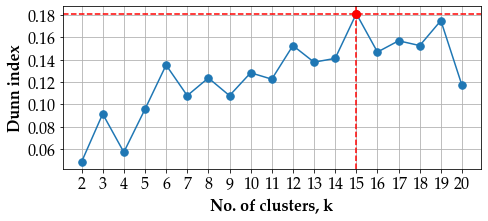

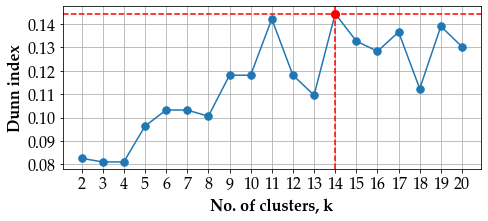

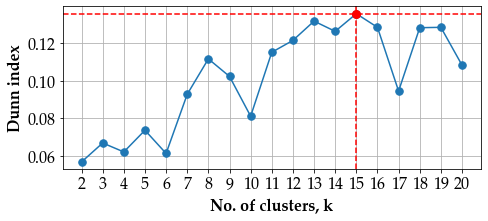

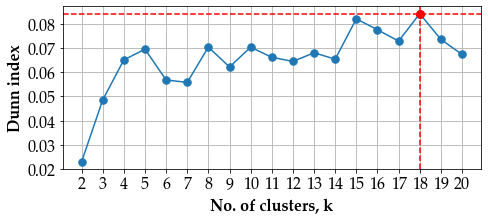

In [4]:
plt.rcParams['font.family']='Palatino Linotype'
for i, attribute in zip(range(4), expt_results.keys()):
    plt.figure(figsize=(7.5,3))
    plt.plot(np.arange(2,21),dunn_indexes[i,:],'.',markersize=15,color='#1f77b4')
    plt.plot(np.arange(2,21),dunn_indexes[i,:],color='#1f77b4')
    plt.plot(np.argmax(dunn_indexes[i,:])+2,np.max(dunn_indexes[i,:]),'.',color='r',markersize=16)
    plt.axvline(x=np.argmax(dunn_indexes[i,:])+2, color='r', linestyle='--')
    plt.axhline(y=np.max(dunn_indexes[i,:]), color='r', linestyle='--')
    plt.xlabel('No. of clusters, k',fontsize=16,fontweight='bold')
    plt.ylabel('Dunn index',fontsize=16,fontweight='bold')
    plt.xticks(ticks = np.arange(2,21),fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid()

Expected output of the above block:

<img src="..\\figures\\dunn_fne.svg" width=500>
<img src="..\\figures\\dunn_cnr.svg" width=500>
<img src="..\\figures\\dunn_cnt.svg" width=500>
<img src="..\\figures\\dunn_bnl.svg" width=500>

# Part 6: Cluster plots

Based on the Dunn index computation in the previous part, the highest Dunn indices were obtained (for $k\in[2,20]$) for the attributes "Full of life & exciting", "Chaotic & restless", "Calm & tranquil", and "Boring & lifeless" at $k=15,14,15,18$, so we extract out the centres that give the highest Dunn indices from `expt_results`.

In [5]:
attribute_to_k_dict = {'Full of life & exciting': 15,
                       'Chaotic & restless': 14,
                       'Calm & tranquil': 15,
                       'Boring & lifeless': 18}

Make the plots of clusters and points (sans the overlay of the Singapore map). At the same time, obtain the closest point to each cluster and that will be the actual location to go record as stored in `actual_locations`.

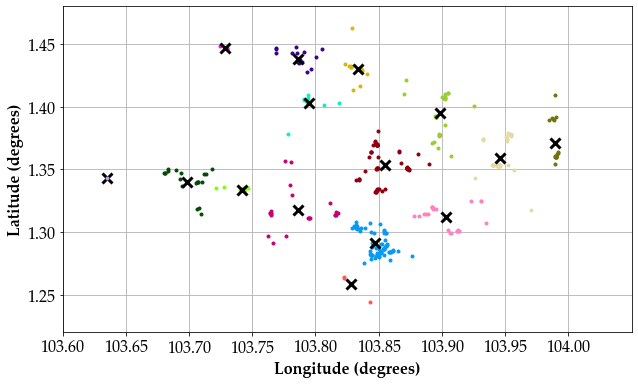

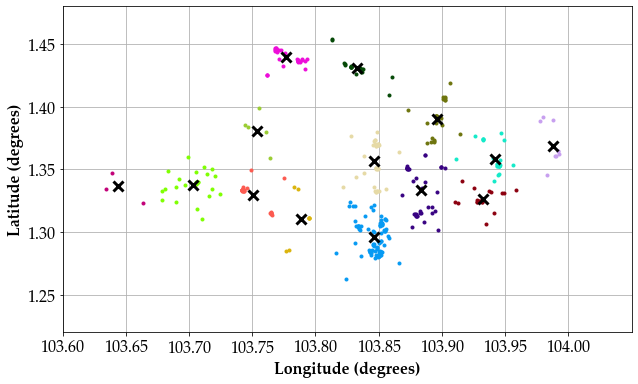

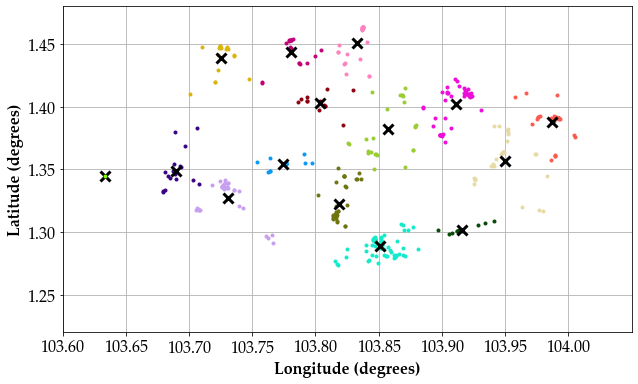

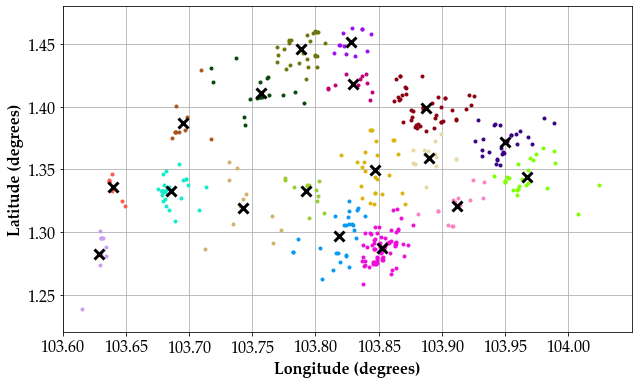

In [7]:
plt.rcParams['font.family']='Palatino Linotype'
point_idxss = []
actual_locationss = []
latlng = pd.read_csv(os.path.join('..','data','latlng.csv'))
with open('expt_results_ref.pickle','rb') as fh: expt_results = pickle.load(fh)
for start_idx, attribute, k in zip([0,4,8,12], attribute_to_k_dict.keys(), attribute_to_k_dict.values()):
    points = latlng.iloc[:,start_idx:start_idx+2].to_numpy() # points.shape = (402,2)
    centres = expt_results[attribute][k]['centres'][np.argmax(expt_results[attribute][k]['dunn_indexes'])]
    clusters = expt_results[attribute][k]['clusters'][np.argmax(expt_results[attribute][k]['dunn_indexes'])]
    
    dist_from_centres_to_points = cdist(centres, points, metric = haversine_distance)
    point_idxs = np.argmin(dist_from_centres_to_points, axis = 1)
    point_idxss.append(point_idxs)
    actual_locations = points[point_idxs,:]
    actual_locationss.append(actual_locations)
    
    plot_results(points,centres,clusters,scale=0.6)

Expected output of the above block:

<img src="..\\figures\\clusters_fne.svg" width=650>
<img src="..\\figures\\clusters_cnr.svg" width=650>
<img src="..\\figures\\clusters_cnt.svg" width=650>
<img src="..\\figures\\clusters_bnl.svg" width=650>

You may also want to view the points and characteristic locations in an interactive Google map at: https://www.google.com/maps/d/u/0/edit?mid=16fjoOwG-AnmwhTfc4MR11DrL_6iDL979